In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('/content/shootings_wash_post.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,6048,TK TK,2020-08-15,shot,knife,NaN,M,NaN,Denver,CO,False,attack,Not fleeing,False
5548,6042,Thomas Moles,2020-08-16,shot,undetermined,35.0,M,W,Maury County,TN,False,other,Other,False
5549,6043,Jose Manuel Castro,2020-08-16,shot,knife,27.0,M,H,Dos Palos,CA,False,other,Not fleeing,False
5550,6044,Jeffrey Hubbard,2020-08-16,shot,gun,67.0,M,W,Las Vegas,NV,True,other,Not fleeing,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5552 non-null   int64  
 1   name                     5552 non-null   object 
 2   date                     5552 non-null   object 
 3   manner_of_death          5552 non-null   object 
 4   armed                    5339 non-null   object 
 5   age                      5307 non-null   float64
 6   gender                   5551 non-null   object 
 7   race                     4966 non-null   object 
 8   city                     5552 non-null   object 
 9   state                    5552 non-null   object 
 10  signs_of_mental_illness  5552 non-null   bool   
 11  threat_level             5552 non-null   object 
 12  flee                     5290 non-null   object 
 13  body_camera              5552 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
df.isnull().values.sum()

1307

In [5]:
df['age']= df['age'].fillna(df['age'].median())

In [6]:
df['armed']=df['armed'].fillna(df['armed'].mode())

In [7]:
df['armed'].value_counts()

gun                        3146
knife                       818
unarmed                     355
toy weapon                  193
undetermined                168
                           ... 
baseball bat and bottle       1
fireworks                     1
pen                           1
chainsaw                      1
bottle                        1
Name: armed, Length: 94, dtype: int64

In [8]:
df['gender']=df['gender'].fillna(df['gender'].mode())

In [9]:
df['race'].value_counts()

W    2518
B    1314
H     914
A      94
N      78
O      48
Name: race, dtype: int64

In [10]:
df['race'].isnull().values.sum()

586

In [11]:
def impute_nan_create_category(DataFrame,ColName):
    DataFrame[ColName]=np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])

impute_nan_create_category(df,'race')

In [12]:
df['race'].value_counts()

W          2518
B          1314
H           914
Unknown     586
A            94
N            78
O            48
Name: race, dtype: int64

In [13]:
df['flee']=df['flee'].fillna(df['flee'].mode())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5552 non-null   int64  
 1   name                     5552 non-null   object 
 2   date                     5552 non-null   object 
 3   manner_of_death          5552 non-null   object 
 4   armed                    5339 non-null   object 
 5   age                      5552 non-null   float64
 6   gender                   5551 non-null   object 
 7   race                     5552 non-null   object 
 8   city                     5552 non-null   object 
 9   state                    5552 non-null   object 
 10  signs_of_mental_illness  5552 non-null   bool   
 11  threat_level             5552 non-null   object 
 12  flee                     5290 non-null   object 
 13  body_camera              5552 non-null   bool   
dtypes: bool(2), float64(1), 

In [15]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,10))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

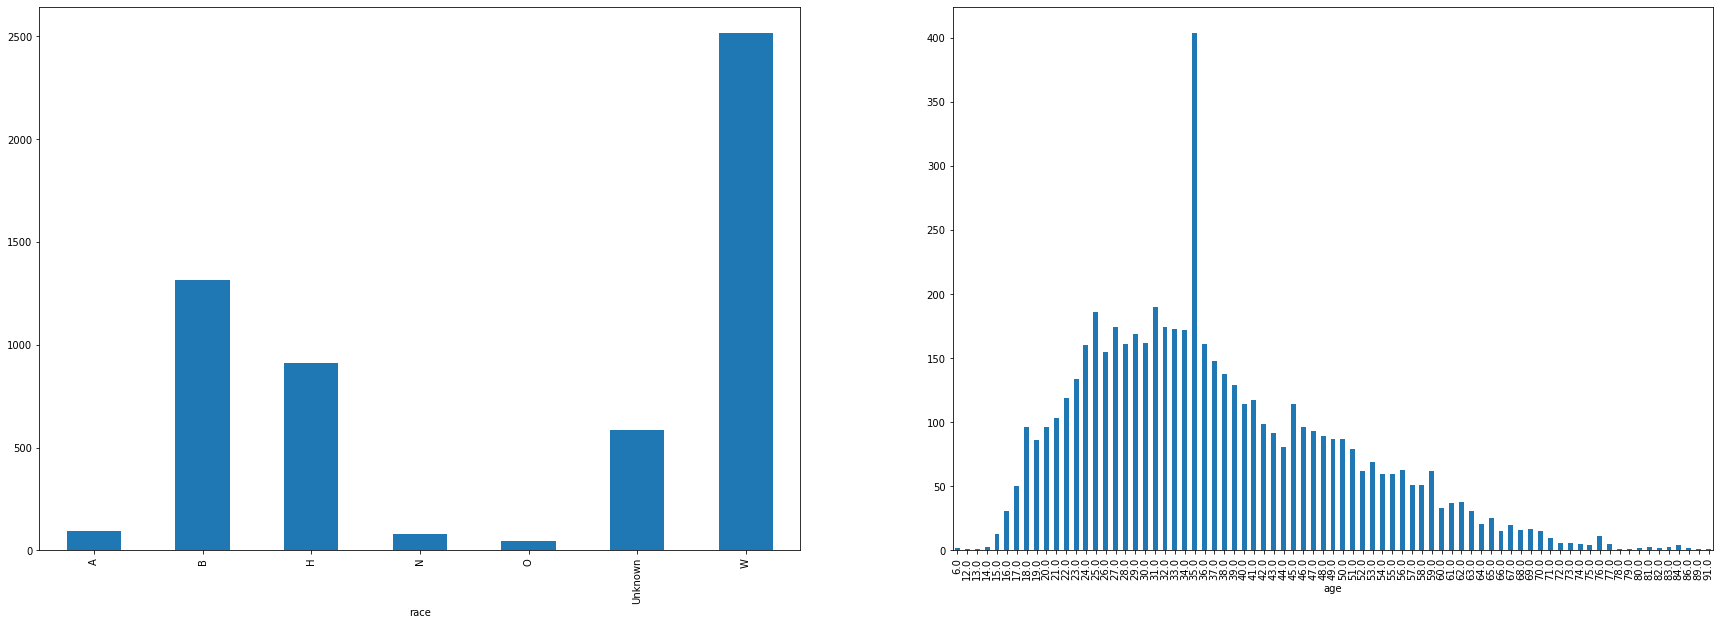

In [16]:
PlotBarCharts(df,['race','age'])

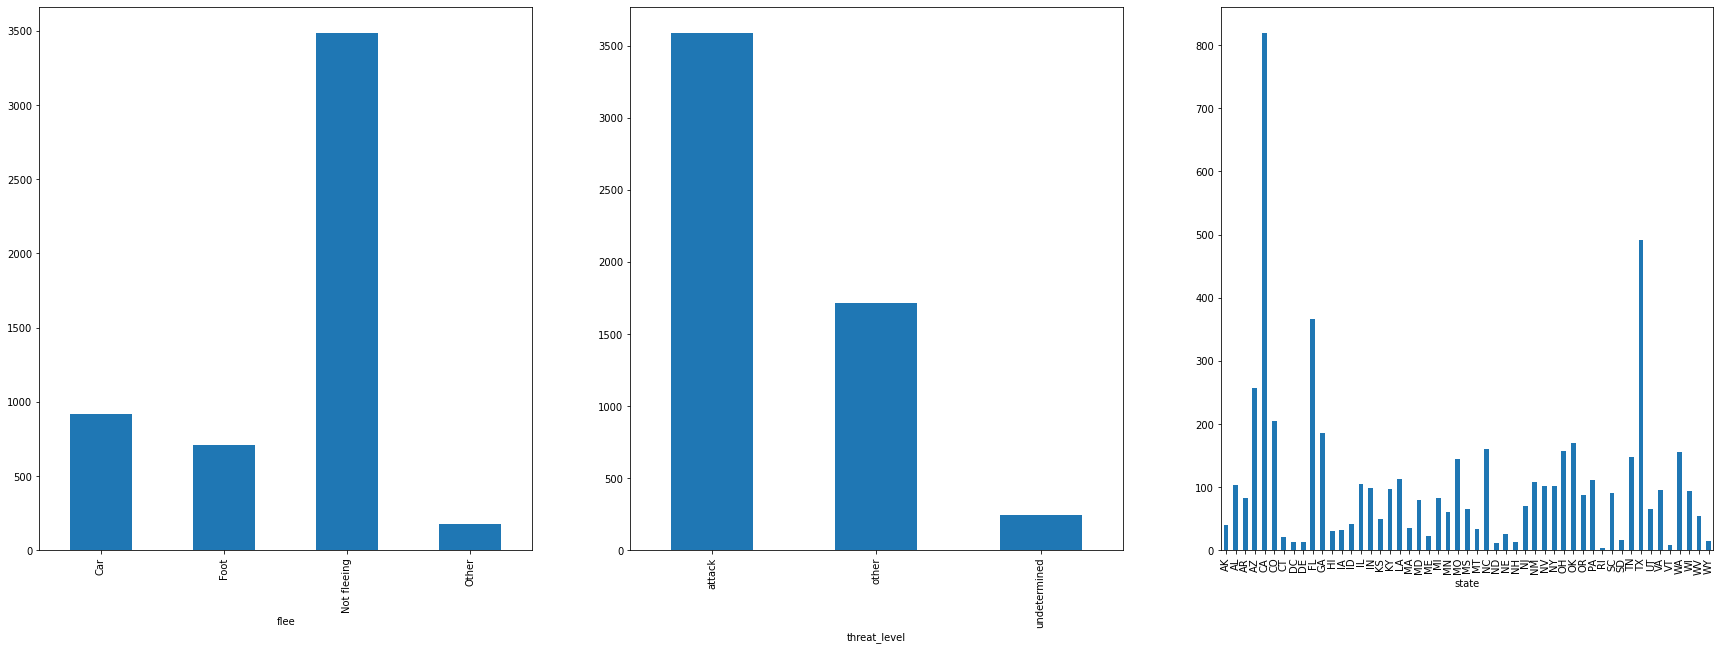

In [17]:
PlotBarCharts(df,['flee','threat_level','state'])

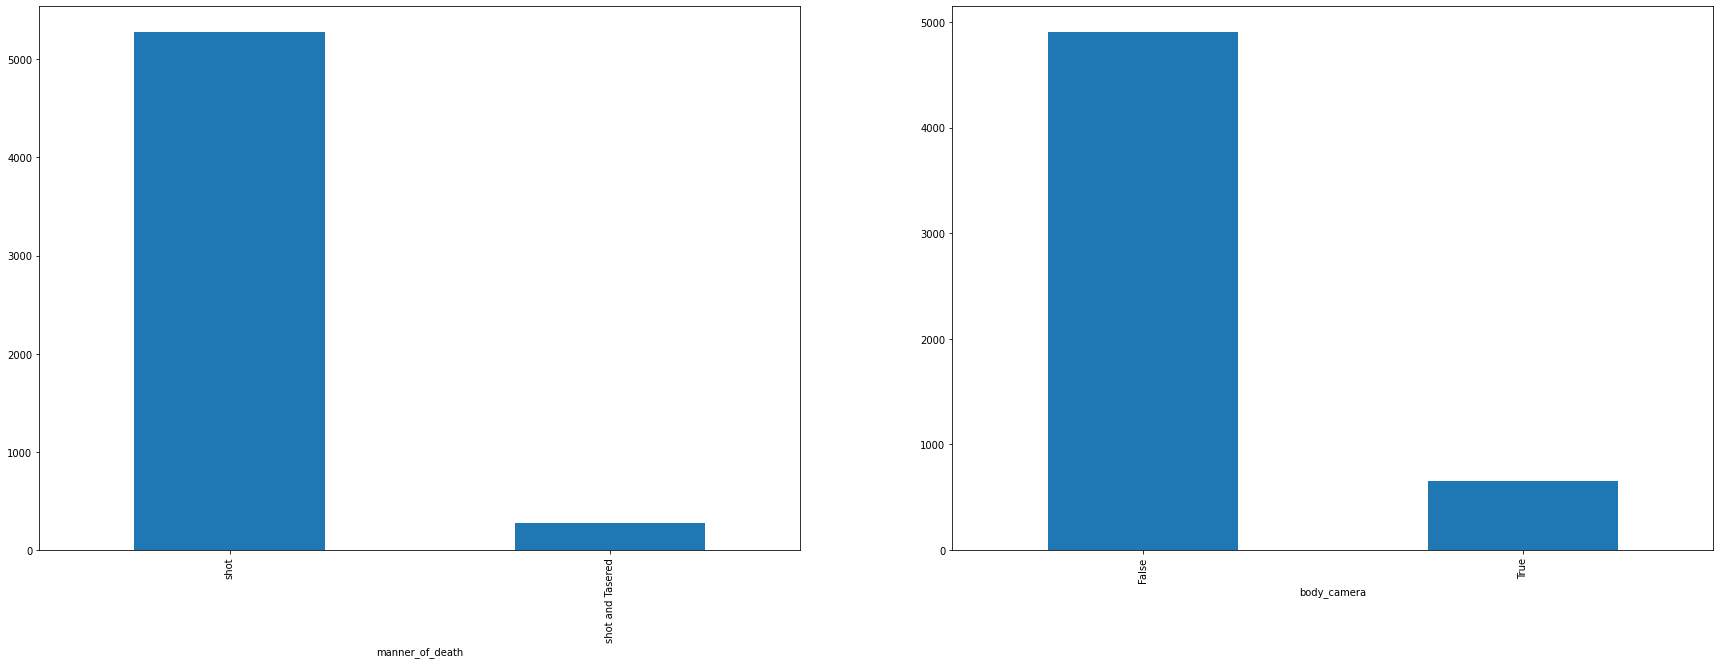

In [53]:
PlotBarCharts(df,['manner_of_death','body_camera'])

In [45]:
pd.crosstab(df['manner_of_death'],df['race'])

race,A,B,H,N,O,Unknown,W
manner_of_death,,,,,,,
shot,86,1243,864,77,43,561,2401
shot and Tasered,8,71,50,1,5,25,117


In [49]:
def plot_bar_cplx(df, idf, feat, plt_title="You forgot the title", hor=False, how_many=5):
    """Plot a bar plot of values in a given feature
    Stands for `plot bar complex`
    """
    
    if(hor==False):
        df = df.groupby([feat], as_index=False).agg({idf: 'count'}).sort_values(by=idf, ascending=False).head(how_many)
        colors = ['#f8766d',] * df.shape[0]
        colors[0] = 'red'

        fig = go.Figure([go.Bar(x=df[feat], y=df[idf], marker_color=colors)])
    else:
      df = df.groupby([feat], as_index=False).agg({idf: 'count'}).sort_values(by=idf, ascending=True).tail(how_many)
      colors = ['#f8766d',] * df.shape[0]
      colors[(df.shape[0]-1)] = 'red'

        
    fig = go.Figure([go.Bar(y=df[feat], x=df[idf], orientation='h', marker_color=colors)])
    
    # template enhancement
    fig.update_layout(
        template="plotly_dark",
        title={
            "text": plt_title,
            "font": {"family": "Rockwell", "size": 25},
            "yanchor": "top",
        },
    )
    fig.show()

In [50]:
plot_bar_cplx(df, 'id', 'armed', "Most commonly wielded weapons by people", hor=True, how_many=10)